# Image-Text Retrieval 

### **🌐📸🔊 Multimodal**

Multimodal models 🌐📸🔊 are machine learning architectures designed to process and integrate information from multiple modalities, such as text, images, audio, and other data types, into a cohesive representation. These models utilize various techniques like fusion mechanisms, attention mechanisms, and cross-modal learning to capture rich interactions between different modalities, enabling them to perform tasks like image captioning, video understanding, and more, by leveraging the complementary information present across different modalities.

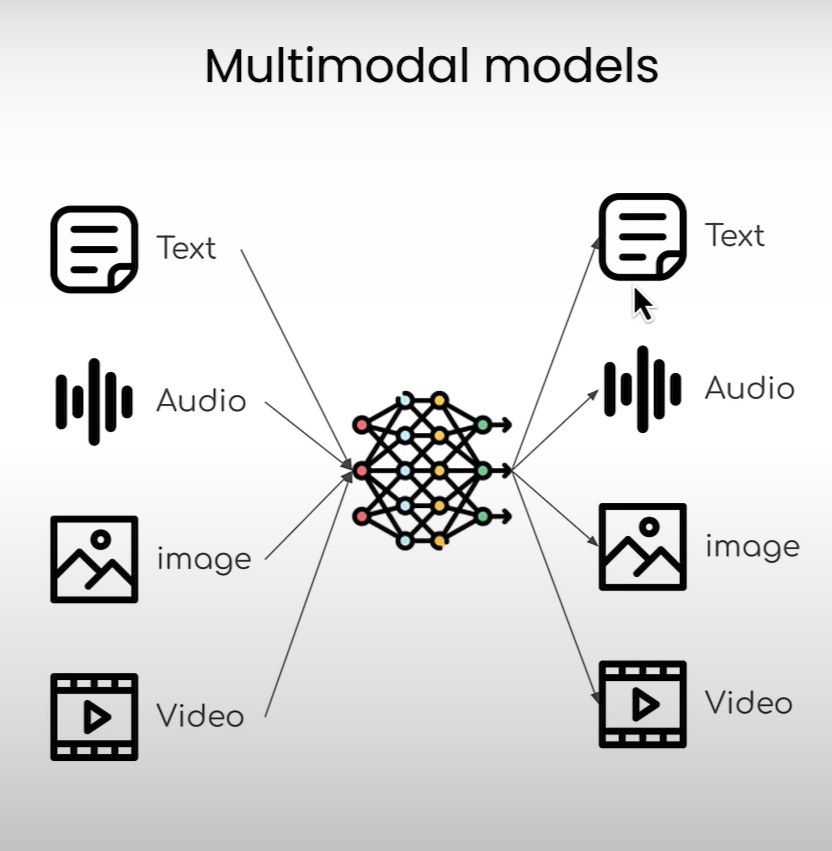



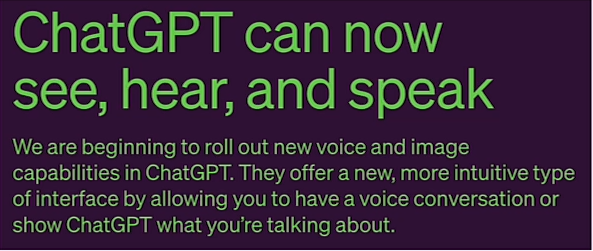

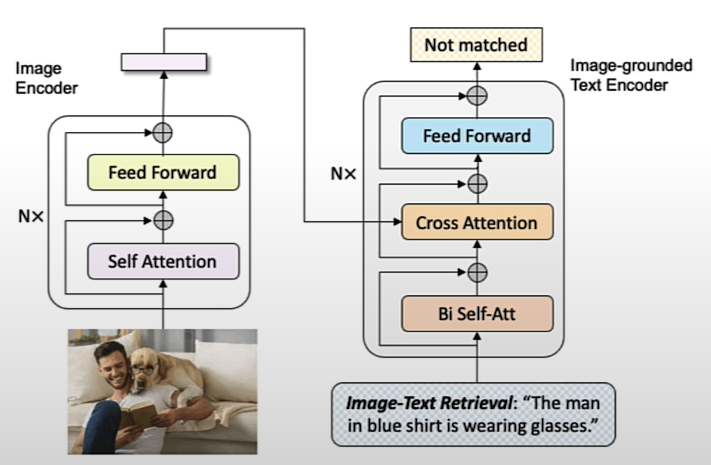

### 👽 Import Libraries


In [1]:
# to avoid warnings

from transformers.utils import logging

logging.set_verbosity_error()

#### Bootstrapping Language-Image Pre-training🌐📸📝

BLIP Model: Proposed in BLIP: Bootstrapping Language-Image Pre-training for Unified Vision-Language Understanding and Generation by Junnan Li, Dongxu Li, Caiming Xiong, Steven Hoi.

**Tasks: BLIP excels in various multi-modal tasks such as:**

- Visual Question Answering 🤔➡️📸
- Image-Text Retrieval (Image-text matching) 🔎🖼️📝
- Image Captioning 🖼️📝

- Abstract: BLIP is a versatile VLP framework adept at both understanding and generation tasks. It effectively utilizes noisy web data through bootstrapping captions, resulting in state-of-the-art performance across vision-language tasks.

### Build the image-text retrieval pipeline using 🤗 Transformers Library

In [2]:
from transformers import BlipForImageTextRetrieval

### About Salesforce: 

Salesforce AI Research is dedicated to pioneering AI advancements to revolutionize our company, customers, and global communities 🚀. Their innovative products harness AI to enhance customer relationship management, optimize sales processes, and drive business intelligence, empowering organizations to thrive in the digital era 🌐💼.


- 👉 Salesforce: https://www.salesforceairesearch.com/
- 👉 model: https://huggingface.co/Salesforce/blip-itm-base-coco

BLIP: Bootstrapping Language-Image Pre-training for Unified Vision-Language Understanding and Generation
Model card for BLIP trained on **`image-text matching`** - base architecture (with ViT base backbone) trained on COCO dataset.

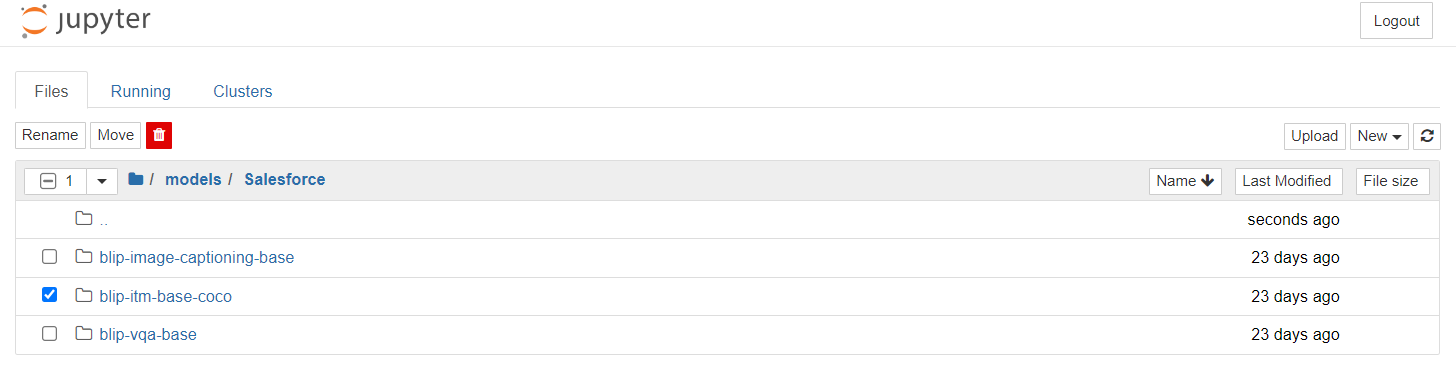

In [3]:
model = BlipForImageTextRetrieval.from_pretrained("models/Salesforce/blip-itm-base-coco")

In [4]:
print(f"model of image-text retrival is: \n {model} in memory address")

model of image-text retrival is: 
 BlipForImageTextRetrieval(
  (vision_model): BlipVisionModel(
    (embeddings): BlipVisionEmbeddings(
      (patch_embedding): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
    (encoder): BlipEncoder(
      (layers): ModuleList(
        (0-11): 12 x BlipEncoderLayer(
          (self_attn): BlipAttention(
            (dropout): Dropout(p=0.0, inplace=False)
            (qkv): Linear(in_features=768, out_features=2304, bias=True)
            (projection): Linear(in_features=768, out_features=768, bias=True)
          )
          (layer_norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): BlipMLP(
            (activation_fn): GELUActivation()
            (fc1): Linear(in_features=768, out_features=3072, bias=True)
            (fc2): Linear(in_features=3072, out_features=768, bias=True)
          )
          (layer_norm2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        )
      )
    )
    (post_layern

**AutoProcessor 📊🤖** is a comprehensive tool developed by Salesforce AI Research to automate and streamline data processing tasks 🛠️. It efficiently handles data extraction, transformation, and loading processes, accelerating data-driven decision-making and improving operational efficiency across various domains such as sales, marketing, and customer service.

In [5]:
from transformers import AutoProcessor


In [9]:
processor = AutoProcessor.from_pretrained("Salesforce/blip-itm-base-coco")

In [11]:
print(f"processor details : \n{processor}")

processor details : 
BlipProcessor:
- image_processor: BlipImageProcessor {
  "do_convert_rgb": true,
  "do_normalize": true,
  "do_pad": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.48145466,
    0.4578275,
    0.40821073
  ],
  "image_processor_type": "BlipImageProcessor",
  "image_std": [
    0.26862954,
    0.26130258,
    0.27577711
  ],
  "processor_class": "BlipProcessor",
  "resample": 3,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 384,
    "width": 384
  },
  "size_divisor": 32
}

- tokenizer: BertTokenizerFast(name_or_path='Salesforce/blip-itm-base-coco', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False

### 🖼️ 📝Image to text retrieval (Image to Text)

In [42]:
#read the image
from PIL import Image
import requests

In [60]:
img_url = 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/demo.jpg'

In [61]:
raw_image =  Image.open(
    requests.get(img_url, stream=True).raw).convert('RGB')

**📌 note:** This code downloads an image from the provided URL, opens it as a PIL image, and converts it to RGB format for further processing.

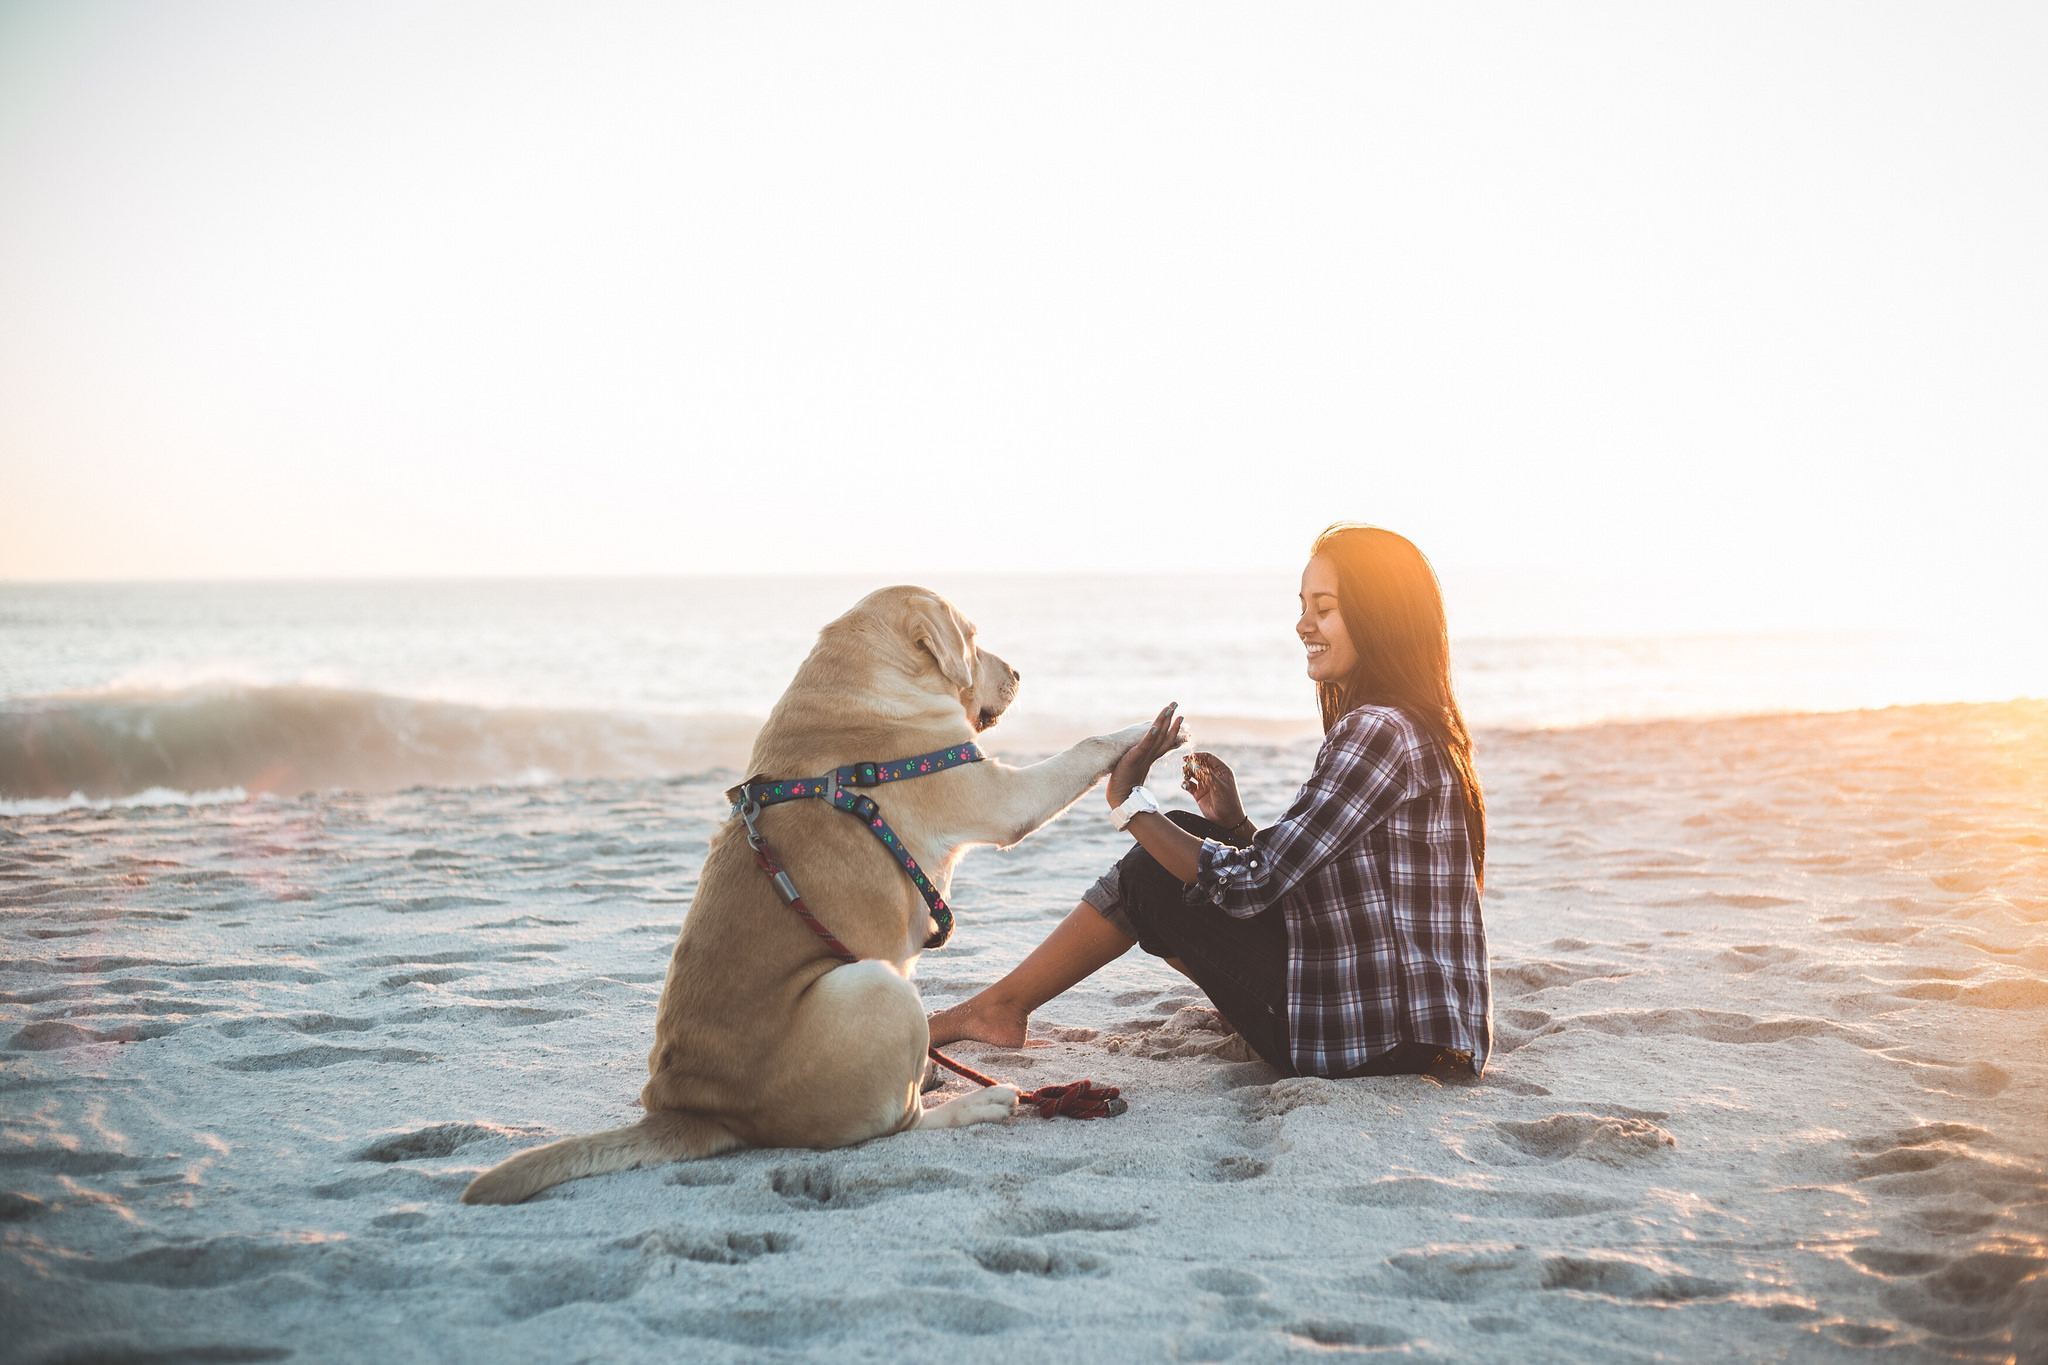

In [62]:
raw_images

# Test the Image Matches the Text

In [63]:
text = "an image of a woman and a dog on the beach"

In [64]:
#pt stands for Pytorch
inputs = processor(images = raw_images,
                   text = text,
                   return_tensors = "pt"
        )

In [65]:
print(f"input details : \n {inputs}")

input details : 
 {'pixel_values': tensor([[[[ 0.8647,  0.9230,  0.9376,  ...,  1.7552,  1.7552,  1.7552],
          [ 0.9084,  0.9376,  0.9522,  ...,  1.7552,  1.7552,  1.7552],
          [ 0.9376,  0.9376,  0.9668,  ...,  1.7552,  1.7552,  1.7552],
          ...,
          [-0.7850, -0.7850, -0.7266,  ..., -0.3178, -0.2740, -0.3616],
          [-0.7558, -0.7558, -0.7412,  ..., -0.3178, -0.3616, -0.4346],
          [-0.7558, -0.7704, -0.7850,  ..., -0.3616, -0.4346, -0.4784]],

         [[ 1.2194,  1.2495,  1.2795,  ...,  1.8948,  1.8948,  1.8948],
          [ 1.2344,  1.2645,  1.2945,  ...,  1.8948,  1.8948,  1.8948],
          [ 1.2495,  1.2795,  1.3095,  ...,  1.8948,  1.8948,  1.8948],
          ...,
          [-0.5965, -0.5965, -0.5515,  ..., -0.4014, -0.3264, -0.4164],
          [-0.5665, -0.5665, -0.5515,  ..., -0.3864, -0.4164, -0.4914],
          [-0.5665, -0.5815, -0.5965,  ..., -0.4164, -0.4764, -0.5365]],

         [[ 1.2927,  1.3211,  1.3496,  ...,  1.9753,  1.9753,  1.97

In [66]:
itm_scores = model(**inputs)[0]

##### 🚴 Code Snippits: 


```
itm_scores = model(**inputs)[0]
```

- model(**inputs): This calls the model with the provided inputs. The **inputs syntax in Python unpacks the dictionary inputs and passes its contents as keyword arguments to the model function.

- [0]: This accesses the first element of the output returned by the model. The output is likely a tuple or a list containing various elements, and [0] retrieves the first element.

- itm_scores: This assigns the result obtained from step 2 to the variable itm_scores, which likely contains the predicted scores for different classes.

In [67]:
itm_scores

tensor([[-2.2228,  2.2260]], grad_fn=<AddmmBackward0>)

In [68]:
import torch

In [69]:
itm_scores = torch.nn.functional.softmax(itm_scores, dim =1)

### 📙 softmax layer to get the probabilities


Softmax function 🌟 is a mathematical operation that converts a vector of arbitrary real values into a probability distribution 📊, ensuring that the sum of probabilities across all classes equals 1. It's commonly used in classification tasks to generate probabilities for each class.

In [70]:
itm_scores

tensor([[0.0116, 0.9884]], grad_fn=<SoftmaxBackward0>)

In [71]:
print(f"""\
The image and text are matched \
with a probability of {itm_scores[0][1]:.4f}""")

The image and text are matched with a probability of 0.9884


### 🖼️ 📝Image to text retrieval

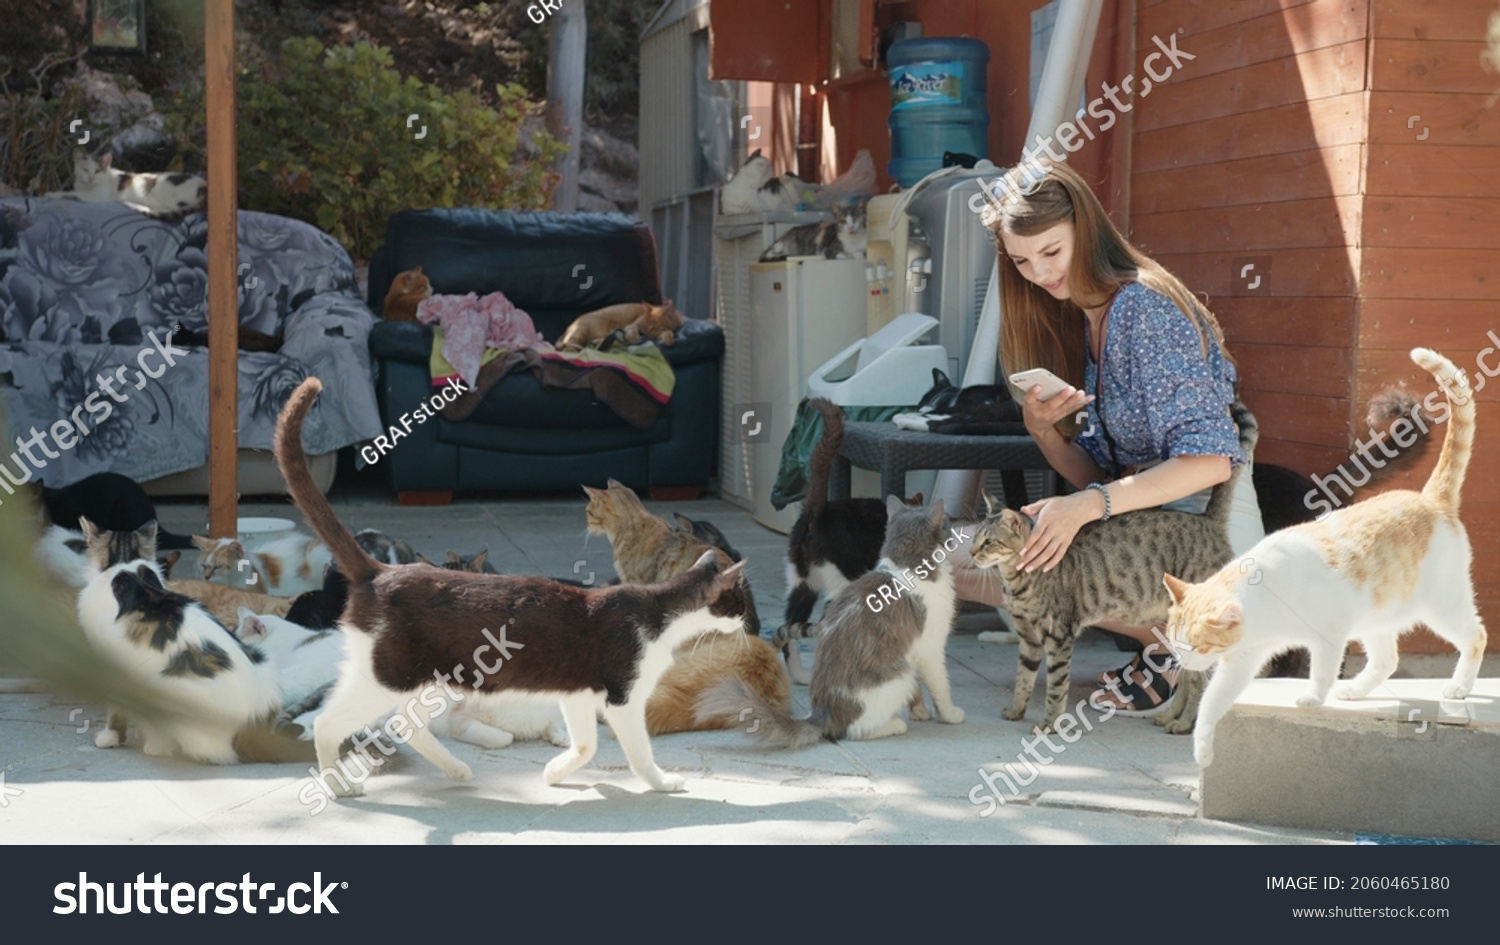

In [85]:
raw_image = Image.open("images.jpg")
raw_image


# Test the Image Matches the Text

In [86]:
text = "an image of a woman and several cats on the road"

In [87]:
#pt stands for Pytorch
inputs = processor(images = raw_image,
                   text = text,
                   return_tensors = "pt"
        )

In [88]:
print(f"input details : \n {inputs}")

input details : 
 {'pixel_values': tensor([[[[-1.2229, -1.1645, -1.1937,  ...,  0.2953,  0.2953,  0.3537],
          [-1.2229, -1.2375, -1.1645,  ...,  0.2807,  0.2515,  0.2953],
          [-1.2083, -1.2229, -1.1645,  ...,  0.2807,  0.2223,  0.2807],
          ...,
          [-1.2229, -1.2229, -1.2229,  ..., -1.2229, -1.2229, -1.2229],
          [-1.2229, -1.2229, -1.2229,  ..., -1.2229, -1.2229, -1.2229],
          [-1.2229, -1.2229, -1.2229,  ..., -1.2229, -1.2229, -1.2229]],

         [[-1.1818, -1.1218, -1.1968,  ..., -0.4464, -0.4314, -0.2963],
          [-1.1968, -1.2118, -1.1668,  ..., -0.4614, -0.4614, -0.3714],
          [-1.2418, -1.2418, -1.1518,  ..., -0.4464, -0.4464, -0.3414],
          ...,
          [-1.0617, -1.0617, -1.0617,  ..., -1.0617, -1.0617, -1.0617],
          [-1.0617, -1.0617, -1.0617,  ..., -1.0617, -1.0617, -1.0617],
          [-1.0617, -1.0617, -1.0617,  ..., -1.0617, -1.0617, -1.0617]],

         [[-1.0110, -0.9541, -1.0252,  ..., -0.6270, -0.6128, -0.48

In [89]:
itm_scores = model(**inputs)[0]

##### 🚴 Code Snippits: 


```
itm_scores = model(**inputs)[0]
```

- model(**inputs): This calls the model with the provided inputs. The **inputs syntax in Python unpacks the dictionary inputs and passes its contents as keyword arguments to the model function.

- [0]: This accesses the first element of the output returned by the model. The output is likely a tuple or a list containing various elements, and [0] retrieves the first element.

- itm_scores: This assigns the result obtained from step 2 to the variable itm_scores, which likely contains the predicted scores for different classes.

In [90]:
itm_scores

tensor([[-0.8932,  0.8906]], grad_fn=<AddmmBackward0>)

In [91]:
import torch

In [92]:
itm_scores = torch.nn.functional.softmax(itm_scores, dim =1)

### 📙 softmax layer to get the probabilities


Softmax function 🌟 is a mathematical operation that converts a vector of arbitrary real values into a probability distribution 📊, ensuring that the sum of probabilities across all classes equals 1. It's commonly used in classification tasks to generate probabilities for each class.

In [93]:
itm_scores

tensor([[0.1438, 0.8562]], grad_fn=<SoftmaxBackward0>)

In [94]:
print(f"""\
The image and text are matched \
with a probability of {itm_scores[0][1]:.4f}""")

The image and text are matched with a probability of 0.8562
